In [6]:
import pandas as pd

In [7]:
# Define a function that gives position for free fall
def FindPosition(x_0,v_0,t):
    return(x_0 + v_0*t + 0.5*9.8*t**2)

In [21]:
import csv
import random

header = ['Initial_position','Initial_velocity','Mass','Time','Position']
with open("freefalldata.csv",'w') as ff:
    filedump = csv.writer(ff, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    filedump.writerow(header)
    for i in range(10000):
        x_0=random.randrange(1,1000)
        v_0 = random.randrange(1,100)
        m = random.randrange(1,100)
        t = random.randrange(1,100)
        p = FindPosition(x_0, v_0,t)
        filedump.writerow([x_0,v_0,m,t,p])
    

In [22]:
import pandas as pd
dataset = pd.read_csv("freefalldata.csv")

In [23]:
dataset.head(2)

,Initial_position,Initial_velocity,Mass,Time,Position
0,84,43,92,29,5451.9
1,720,47,60,94,48434.4


In [24]:
import matplotlib.pyplot as plt

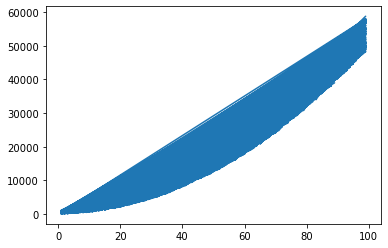

In [26]:
plt.plot(dataset['Time'],dataset['Position'])

In [27]:
from sklearn.model_selection import train_test_split

In [36]:
#Figure out Independent and dependent variable as in the other cases
X = dataset.iloc[:,:-1]

In [38]:
X.head(2)

,Initial_position,Initial_velocity,Mass,Time
0,84,43,92,29
1,720,47,60,94


In [45]:
y = dataset.iloc[:,-1]

In [46]:
y

0        5451.9
1       48434.4
2        4761.4
3        3105.9
4       19488.4
         ...   
9995    22847.4
9996    31895.5
9997     2234.0
9998    23113.0
9999    43427.9
Name: Position, Length: 10000, dtype: float64

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [48]:
X_train.head(2)

,Initial_position,Initial_velocity,Mass,Time
2182,640,23,94,74
5766,133,44,95,24


In [49]:
y_train

2182    29174.4
5766     4011.4
2439    23141.1
993     14842.9
7426    48476.1
         ...   
4859    52625.4
919      3770.6
500     12240.1
4517     1705.9
5925     9542.5
Name: Position, Length: 8000, dtype: float64

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [51]:
pol = PolynomialFeatures(degree=2)
X_train_transform = pol.fit_transform(X_train)
X_test_transform = pol.fit_transform(X_test)

In [53]:
regressor = LinearRegression()
regressor.fit(X_train_transform,y_train)

LinearRegression()

In [57]:
import pickle
filename = 'freefall.pkl'
pickle.dump(regressor,open(filename,'wb'))
regressor = pickle.load(open(filename,'rb'))

In [58]:
y_pred = regressor.predict(X_test_transform)

In [61]:
y_pred[:5]

array([33880.5, 11719.9, 48406.9, 17862.4,  2816.6])

In [62]:
regressor.coef_

array([ 0.00000000e+00,  1.00000000e+00, -2.74272636e-13, -5.77089134e-14,
       -5.00066089e-13,  2.01962589e-16,  1.41986770e-15,  3.92412011e-16,
        6.17085500e-16, -2.50334629e-16, -2.76045850e-15,  1.00000000e+00,
       -4.17242602e-15, -7.50568322e-15,  4.90000000e+00])

In [65]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
print(r2_score(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

1.0
7.201404402561862e-11


In [67]:
['1', 'initial_position', 'initial_velocity', 'mass', 
 'time', 'initial_position^2', 'initial_position initial_velocity', 'initial_position mass',
 'initial_position time', 'initial_velocity^2', 'initial_velocity mass', 'initial_velocity time',
 'mass^2', 'mass time', 'time^2']

['1',
 'initial_position',
 'initial_velocity',
 'mass',
 'time',
 'initial_position^2',
 'initial_position initial_velocity',
 'initial_position mass',
 'initial_position time',
 'initial_velocity^2',
 'initial_velocity mass',
 'initial_velocity time',
 'mass^2',
 'mass time',
 'time^2']

In [72]:
regressor.intercept_

2.546585164964199e-11

In [73]:
regressor.coef_

array([ 0.00000000e+00,  1.00000000e+00, -2.74272636e-13, -5.77089134e-14,
       -5.00066089e-13,  2.01962589e-16,  1.41986770e-15,  3.92412011e-16,
        6.17085500e-16, -2.50334629e-16, -2.76045850e-15,  1.00000000e+00,
       -4.17242602e-15, -7.50568322e-15,  4.90000000e+00])

# model is
# X_0 + v_0*t + 4.9*t^2